# Sensitive Data classification for text
## This model run in google colab https://colab.research.google.com/

In [18]:
import tensorflow as tf
import json
import os
import random
import numpy
import matplotlib.pyplot as plot
import matplotlib.image as matimage
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator as imgData
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [11]:
image_folder = "/content/Sensitive_image_classification"
if os.path.exists(image_folder) != True:
  !git clone https://github.com/ameernayman/Sensitive_image_classification.git

image_training = image_folder + "/dataset_images/image_training"
image_validation = image_folder + "/dataset_images/image_validation"
sensitive_training = os.path.join(image_training + "/image_sensitive")
nonsensitive_training = os.path.join(image_training + "/image_nonsensitive")
sensitive_validation = os.path.join(image_validation + "/image_sensitive")
nonsensitive_validation = os.path.join(image_validation + "/image_nonsensitive")

## Training Sample Dataset

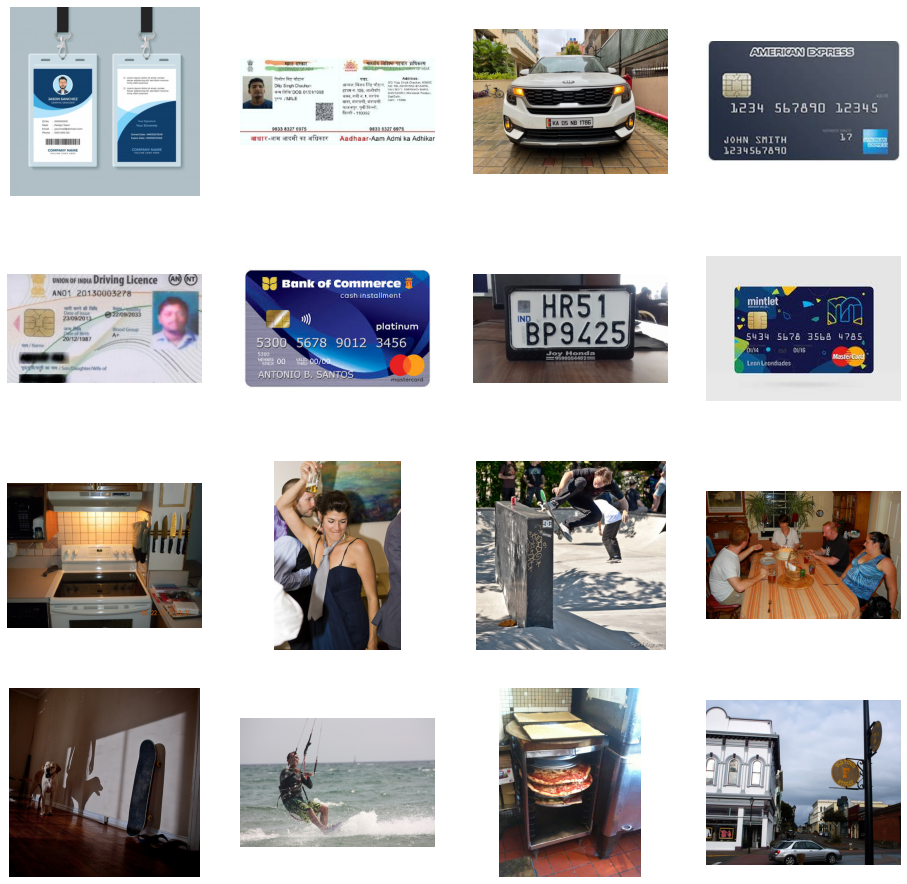

In [14]:
%matplotlib inline



no_rows = 4
no_cols = 4
figure = plot.gcf()
figure.set_size_inches(no_cols * 4, no_rows * 4)

index = 0

list_training_sensitive = os.listdir(sensitive_training)
list_training_nonsensitive = os.listdir(nonsensitive_training)

index += 8
sens_images = [os.path.join(sensitive_training, fname) 
                for fname in list_training_sensitive[index-8:index]]
nonsens_images = [os.path.join(nonsensitive_training, fname) 
                for fname in list_training_nonsensitive[index-8:index]]

for val, path in enumerate(sens_images+nonsens_images):
  sub_pot = plot.subplot(no_rows, no_cols, val + 1)
  sub_pot.axis('Off')

  image = matimage.imread(path)
  plot.imshow(image)

plot.show()

## CallBack function


In [24]:
no_epochs = 500
ACCURACY = 0.99
class myEpoch(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('acc') > ACCURACY:
      print(" Accurracy is 0.99 then cancel the epoch")
      self.model.stop_training = True

epoch_callbacks = myEpoch()

## Model

In [17]:

image_model = tf.keras.models.Sequential([
 
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),

  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

image_model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['acc'])


image_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

## Valdation and Training Dataset Augmentation and  model fitting, 

In [25]:

dataset_train = imgData(rescale=1/255,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')
validation_datagen = imgData(rescale=1/255)

gen_training = dataset_train.flow_from_directory(
        image_training,
        target_size=(150, 150),
        batch_size=30,
        class_mode='binary',
        shuffle=True
       )

validation_generator = validation_datagen.flow_from_directory(
        image_validation,
        target_size=(150, 150),
        batch_size=5,
        class_mode='binary',
        shuffle=True
        )


data_his = image_model.fit(
      gen_training,
      steps_per_epoch=10,
      epochs=no_epochs,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8,
      callbacks=[epoch_callbacks])

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Epoch 1/500
10/10 [==============================] - 4s 391ms/step - loss: 0.5317 - acc: 0.7567 - val_loss: 0.3982 - val_acc: 0.8000
Epoch 2/500
10/10 [==============================] - 5s 515ms/step - loss: 0.5209 - acc: 0.7367 - val_loss: 0.2658 - val_acc: 0.9500
Epoch 3/500
10/10 [==============================] - 4s 353ms/step - loss: 0.5094 - acc: 0.7600 - val_loss: 0.3684 - val_acc: 0.8750
Epoch 4/500
10/10 [==============================] - 4s 375ms/step - loss: 0.4685 - acc: 0.7767 - val_loss: 0.4115 - val_acc: 0.8500
Epoch 5/500
10/10 [==============================] - 85s 9s/step - loss: 0.4751 - acc: 0.8000 - val_loss: 0.3759 - val_acc: 0.8750
Epoch 6/500
10/10 [==============================] - 4s 377ms/step - loss: 0.5299 - acc: 0.7567 - val_loss: 0.3394 - val_acc: 0.8500
Epoch 7/500
10/10 [==============================] - 4s 427ms/step - loss: 0.5108 - acc: 0.7633 - val_loss: 0.3980 - val_a

## Plotting Accuracy and Loss graph for Image Model

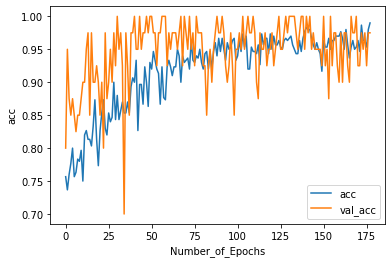

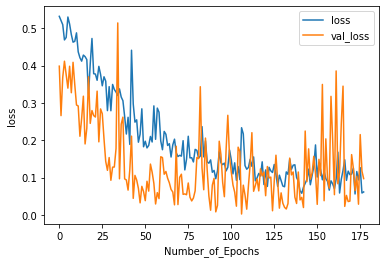

In [26]:
def graphsPlot(data_his, str):
  plot.plot(data_his.history[str])
  plot.plot(data_his.history['val_'+str])
  plot.xlabel("Number_of_Epochs")
  plot.ylabel(str)
  plot.legend([str, 'val_'+str])
  plot.show()
  
graphsPlot(data_his, "acc")
graphsPlot(data_his, "loss")

## Ploting the Confusion Matrix for Image model

Accuracy for 25 Image Data =  40.0
Accuracy for 50 Image Data =  42.857142857142854
Accuracy for 75 Image Data =  46.666666666666664
Accuracy for 100 Image Data =  43.43434343434344


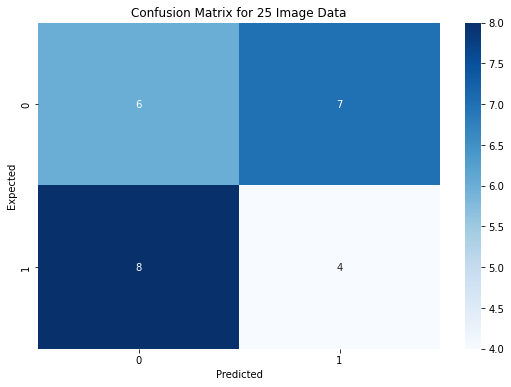

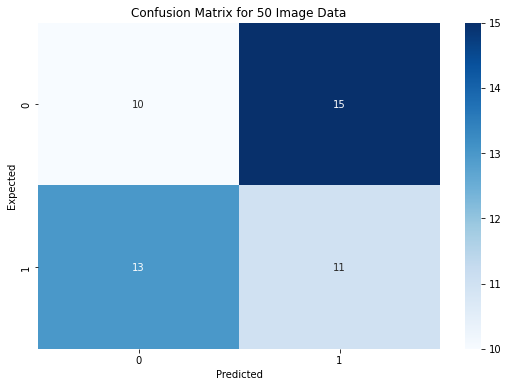

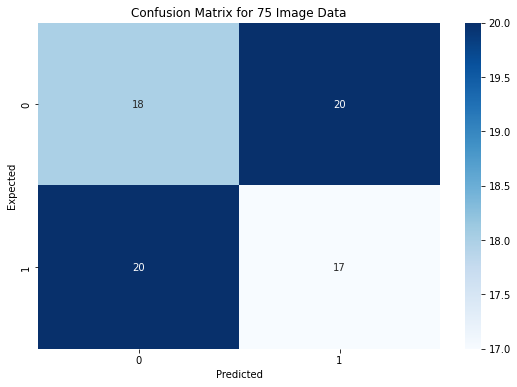

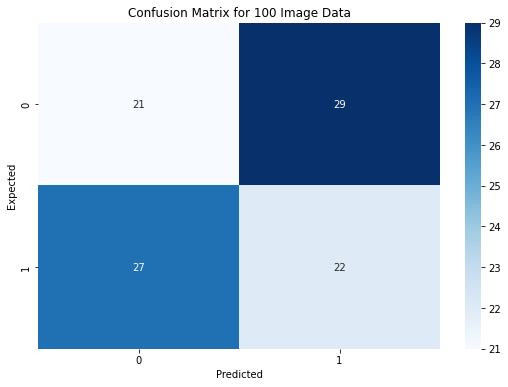

In [32]:
import seaborn
image_predicted = image_model.predict(validation_generator,20)
predicted_image_labels = image_predicted > 0.5

length = numpy.size(predicted_image_labels)
predicted_image_labels = predicted_image_labels.reshape(length, )

for count in range (1, 5):
  value = count * length // 4
  image_mid = 49
  image_start = image_mid-((value+1)//2)+1
  image_end = image_mid+((value+1)//2)
  confusion_matrix = tf.math.confusion_matrix(labels=validation_generator.labels[image_start:image_end],predictions=predicted_image_labels[image_start:image_end])

  confusion_numpy = confusion_matrix.numpy()
  confidence_accuracy = (confusion_numpy[0, 0] + confusion_numpy[1, 1])/ numpy.sum(confusion_numpy) * 100
  print("Accuracy for", str(value), "Image Data = ", confidence_accuracy)

  plot.figure(figsize = (9,6))
  seaborn.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
  plot.title("Confusion Matrix for " + str(value) + " Image Data")
  plot.xlabel('Predicted')
  plot.ylabel('Expected')

## Experiment


Saving Academic Rep Certificates 2022-Ameer Hussain Nayman.jpg to Academic Rep Certificates 2022-Ameer Hussain Nayman (3).jpg
Saving COCO_train2014_000000026227.jpg to COCO_train2014_000000026227 (1).jpg
[1.]
Academic Rep Certificates 2022-Ameer Hussain Nayman.jpg - Sensitive
[0.00106932]
COCO_train2014_000000026227.jpg - Non-sensitive


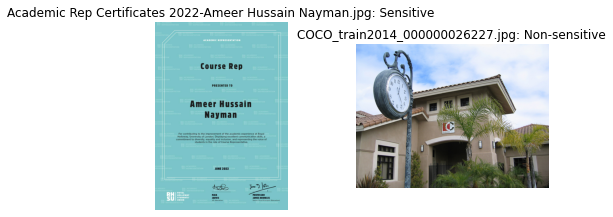

In [ ]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
result = dict()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " - Sensitive")
    result[fn] = "Sensitive"
  else:
    print(fn + " - Non-sensitive")
    result[fn] = "Non-sensitive"

plt.figure(figsize=(20,20))
   
for i, fn in enumerate(uploaded.keys()):
  image = plt.imread(fn)  
  plt.subplot(5, 5, i+1)
  plt.axis("off")
  plt.imshow(image)
  ans = fn + ": " + result[fn]
  plt.title(ans)